# Wyliczanie statystyk  między danymi generowanymi a treningowymi

In [ ]:
import muspy, os
import numpy as np
import matplotlib.pyplot as plt

## Wyliczanie statystyk samples from dir e1-e4 ( dir : generatedSeq )

In [36]:
import os
# gen_dir = './../generatedSeq/'
gen_dir = './../generatedSeq_base1/'
# gen_dir = './../generatedSeq_base1_70/'

emo = {0: 'e1', 1: 'e2', 2: 'e3', 3: 'e4'}

def listdir_nohidden(path):
    for f in os.listdir(path):
        if not f.startswith('.'):
            yield f

def jg_odczyt_z_dir(dir_source, verbose = True):    
    counter = []
    for j in range(len(emo)): 
        directory = emo[j] + "/"
        path = os.path.join(dir_source, directory) 
        print('******************************')
        print(path)
        
        pitch_range =  []
        n_pitches_used =  []
        pitch_in_scale_rate = []
        pitch_in_scale_rate_Cmin = []
        groove_consistency = []
        polyphony_rate = []
        
    

    #     lista_plikow = os.listdir(path)
        lista_plikow = listdir_nohidden(path)

        i = 0  
        k = 0
        res = []
        for file_name in  lista_plikow :   # JG wczytanie katalogu  
            if i > 76 :    # jg ograniczenie do 76 plikow
                break
            file_path = path + file_name  
            if verbose :
                print (file_path)
            loaded_music = muspy.read_midi(file_path)
            music = loaded_music
            if verbose :
                print(i , music.metadata.source_filename, ', resolution:' + str(music.resolution), ', Tracks:' 
                      + str(len(music.tracks)), ', Ilośc nut: ' + str(len(loaded_music.tracks[0]))) 
            i += 1
            #----------------
            value = muspy.pitch_range(music)
            pitch_range.append(value)
            
            value = muspy.n_pitches_used(music)
            n_pitches_used.append(value)
            
            value = muspy.pitch_in_scale_rate( music, 0, 'major')
            pitch_in_scale_rate.append(value)
            
            value =  muspy.pitch_in_scale_rate( music, 0, 'minor') 
            pitch_in_scale_rate_Cmin.append(value)
            
            value =  muspy.groove_consistency(music, 4)
            groove_consistency.append(value)
            
            value = muspy.polyphony_rate(music, threshold=2)
#             value = muspy.polyphony_rate(music, threshold=3)
            polyphony_rate.append(value)
            #----------------
            
        counter.append(i) 
        # dodanie wynikow do listy            
        pitch_range_Stat.append(pitch_range )
        n_pitches_used_Stat.append(n_pitches_used )
        pitch_in_scale_rate_Stat.append(pitch_in_scale_rate) 
        pitch_in_scale_rate_Cmin_Stat.append(pitch_in_scale_rate_Cmin)
        groove_consistency_Stat.append(groove_consistency)
        polyphony_rate_Stat.append(polyphony_rate)
        
    print ("**************************************************************")
    print ("Ilość plików Wczytano:  e1: ", counter[0], "\t Wczytano:  e2: ", counter[1],
           "\t Wczytano:  e3: ", counter[2],  "\t Wczytano:  e4: ", counter[3], ) 
    print ("**************************************************************")


pitch_range_Stat = []
n_pitches_used_Stat = [] 
pitch_in_scale_rate_Stat = []
pitch_in_scale_rate_Cmin_Stat = []
groove_consistency_Stat = []
polyphony_rate_Stat = []


dir_source = gen_dir
jg_odczyt_z_dir(dir_source, verbose =False)

pitch_range_genStat = pitch_range_Stat
n_pitches_used_genStat = n_pitches_used_Stat
pitch_in_scale_rate_genStat = pitch_in_scale_rate_Stat
pitch_in_scale_rate_Cmin_genStat = pitch_in_scale_rate_Cmin_Stat
groove_consistency_genStat = groove_consistency_Stat
polyphony_rate_genStat = polyphony_rate_Stat 


******************************
./../generatedSeq_base1/e1/
******************************
./../generatedSeq_base1/e2/
******************************
./../generatedSeq_base1/e3/
******************************
./../generatedSeq_base1/e4/
**************************************************************
Ilość plików Wczytano:  e1:  20 	 Wczytano:  e2:  20 	 Wczytano:  e3:  20 	 Wczytano:  e4:  20
**************************************************************


In [13]:
len(pitch_range_genStat[2])

20

In [15]:

gen_prop_dir = './../generatedSeq_mus1_70/'

pitch_range_Stat = []
n_pitches_used_Stat = [] 
pitch_in_scale_rate_Stat = []
pitch_in_scale_rate_Cmin_Stat = []
groove_consistency_Stat = []
polyphony_rate_Stat = []


jg_odczyt_z_dir(gen_prop_dir, verbose =False)

pitch_range_gen_prop_Stat = pitch_range_Stat
n_pitches_used_gen_prop_Stat = n_pitches_used_Stat
pitch_in_scale_rate_gen_prop_Stat = pitch_in_scale_rate_Stat
pitch_in_scale_rate_Cmin_gen_prop_Stat = pitch_in_scale_rate_Cmin_Stat
groove_consistency_gen_prop_Stat = groove_consistency_Stat
polyphony_rate_gen_prop_Stat = polyphony_rate_Stat 

******************************
./../generatedSeq_mus1_70/e1/
******************************
./../generatedSeq_mus1_70/e2/
******************************
./../generatedSeq_mus1_70/e3/
******************************
./../generatedSeq_mus1_70/e4/
**************************************************************
Ilość plików Wczytano:  e1:  20 	 Wczytano:  e2:  20 	 Wczytano:  e3:  20 	 Wczytano:  e4:  20
**************************************************************


## Wyliczanie statystyk training samples from dir e1-e4 ( Refbase )

In [16]:
base_dir = './../savedMidi_music21_keyC_4T_all_v6_zwco3_emo338_Refbase/'

pitch_range_Stat = []
n_pitches_used_Stat = [] 
pitch_in_scale_rate_Stat = []
pitch_in_scale_rate_Cmin_Stat = []
groove_consistency_Stat = []
polyphony_rate_Stat = []

dir_source = base_dir
jg_odczyt_z_dir(dir_source, verbose =False)

pitch_range_trainStat = pitch_range_Stat
n_pitches_used_trainStat = n_pitches_used_Stat
pitch_in_scale_rate_trainStat = pitch_in_scale_rate_Stat
pitch_in_scale_rate_Cmin_trainStat = pitch_in_scale_rate_Cmin_Stat
groove_consistency_trainStat = groove_consistency_Stat
polyphony_rate_trainStat= polyphony_rate_Stat 

******************************
./../savedMidi_music21_keyC_4T_all_v6_zwco3_emo338_Refbase/e1/
******************************
./../savedMidi_music21_keyC_4T_all_v6_zwco3_emo338_Refbase/e2/
******************************
./../savedMidi_music21_keyC_4T_all_v6_zwco3_emo338_Refbase/e3/
******************************
./../savedMidi_music21_keyC_4T_all_v6_zwco3_emo338_Refbase/e4/
**************************************************************
Ilość plików Wczytano:  e1:  77 	 Wczytano:  e2:  77 	 Wczytano:  e3:  77 	 Wczytano:  e4:  77
**************************************************************


In [8]:
# pitch_range_genStat = pitch_range_Stat
print(len(pitch_range_genStat))
print(pitch_range_genStat)

# pitch_range_trainStat = pitch_range_Stat
print(len(pitch_range_trainStat))
print(pitch_range_trainStat)

4
[[58, 33, 54, 29, 38, 33, 50, 36, 55, 36, 29, 58, 48, 58, 52, 36, 57, 53, 26, 35], [36, 36, 29, 53, 38, 35, 29, 29, 31, 36, 24, 27, 29, 58, 38, 26, 32, 35, 59, 24], [35, 59, 46, 58, 34, 34, 27, 29, 34, 58, 58, 31, 48, 54, 32, 30, 28, 31, 29, 58], [31, 38, 30, 59, 36, 26, 30, 51, 58, 31, 52, 34, 53, 29, 55, 31, 33, 41, 31, 58]]
4
[[33, 27, 31, 32, 21, 33, 34, 31, 36, 29, 29, 31, 31, 30, 26, 33, 36, 40, 36, 31, 34, 29, 33, 33, 31, 36, 36, 31, 36, 40, 31, 29, 34, 29, 24, 28, 28, 28, 32, 31, 33, 38, 34, 29, 29, 36, 26, 36, 32, 29, 29, 36, 31, 33, 33, 27, 29, 29, 31, 32, 29, 31, 29, 33, 27, 31, 40, 39, 36, 33, 28, 34, 29, 34, 30, 35, 29], [32, 29, 27, 31, 27, 31, 36, 34, 29, 27, 32, 31, 36, 31, 33, 29, 34, 31, 31, 31, 33, 32, 31, 27, 31, 33, 31, 36, 27, 29, 27, 32, 33, 26, 31, 26, 29, 33, 31, 29, 29, 31, 29, 29, 27, 27, 32, 36, 32, 26, 32, 31, 31, 34, 27, 29, 31, 33, 28, 36, 29, 32, 28, 29, 32, 31, 31, 31, 31, 31, 32, 37, 31, 31, 31, 29, 29], [27, 29, 32, 29, 28, 27, 31, 31, 26, 27, 31, 3

In [6]:
print(np.array(pitch_in_scale_rate_genStat ).shape, np.array(pitch_in_scale_rate_trainStat ).shape)
print(np.array(pitch_in_scale_rate_Cmin_genStat ).shape, np.array(pitch_in_scale_rate_Cmin_trainStat ).shape)

(4, 20) (4, 77)
(4, 20) (4, 77)


### Metric: pitch in scale rate C major

(4, 20) (4, 77)


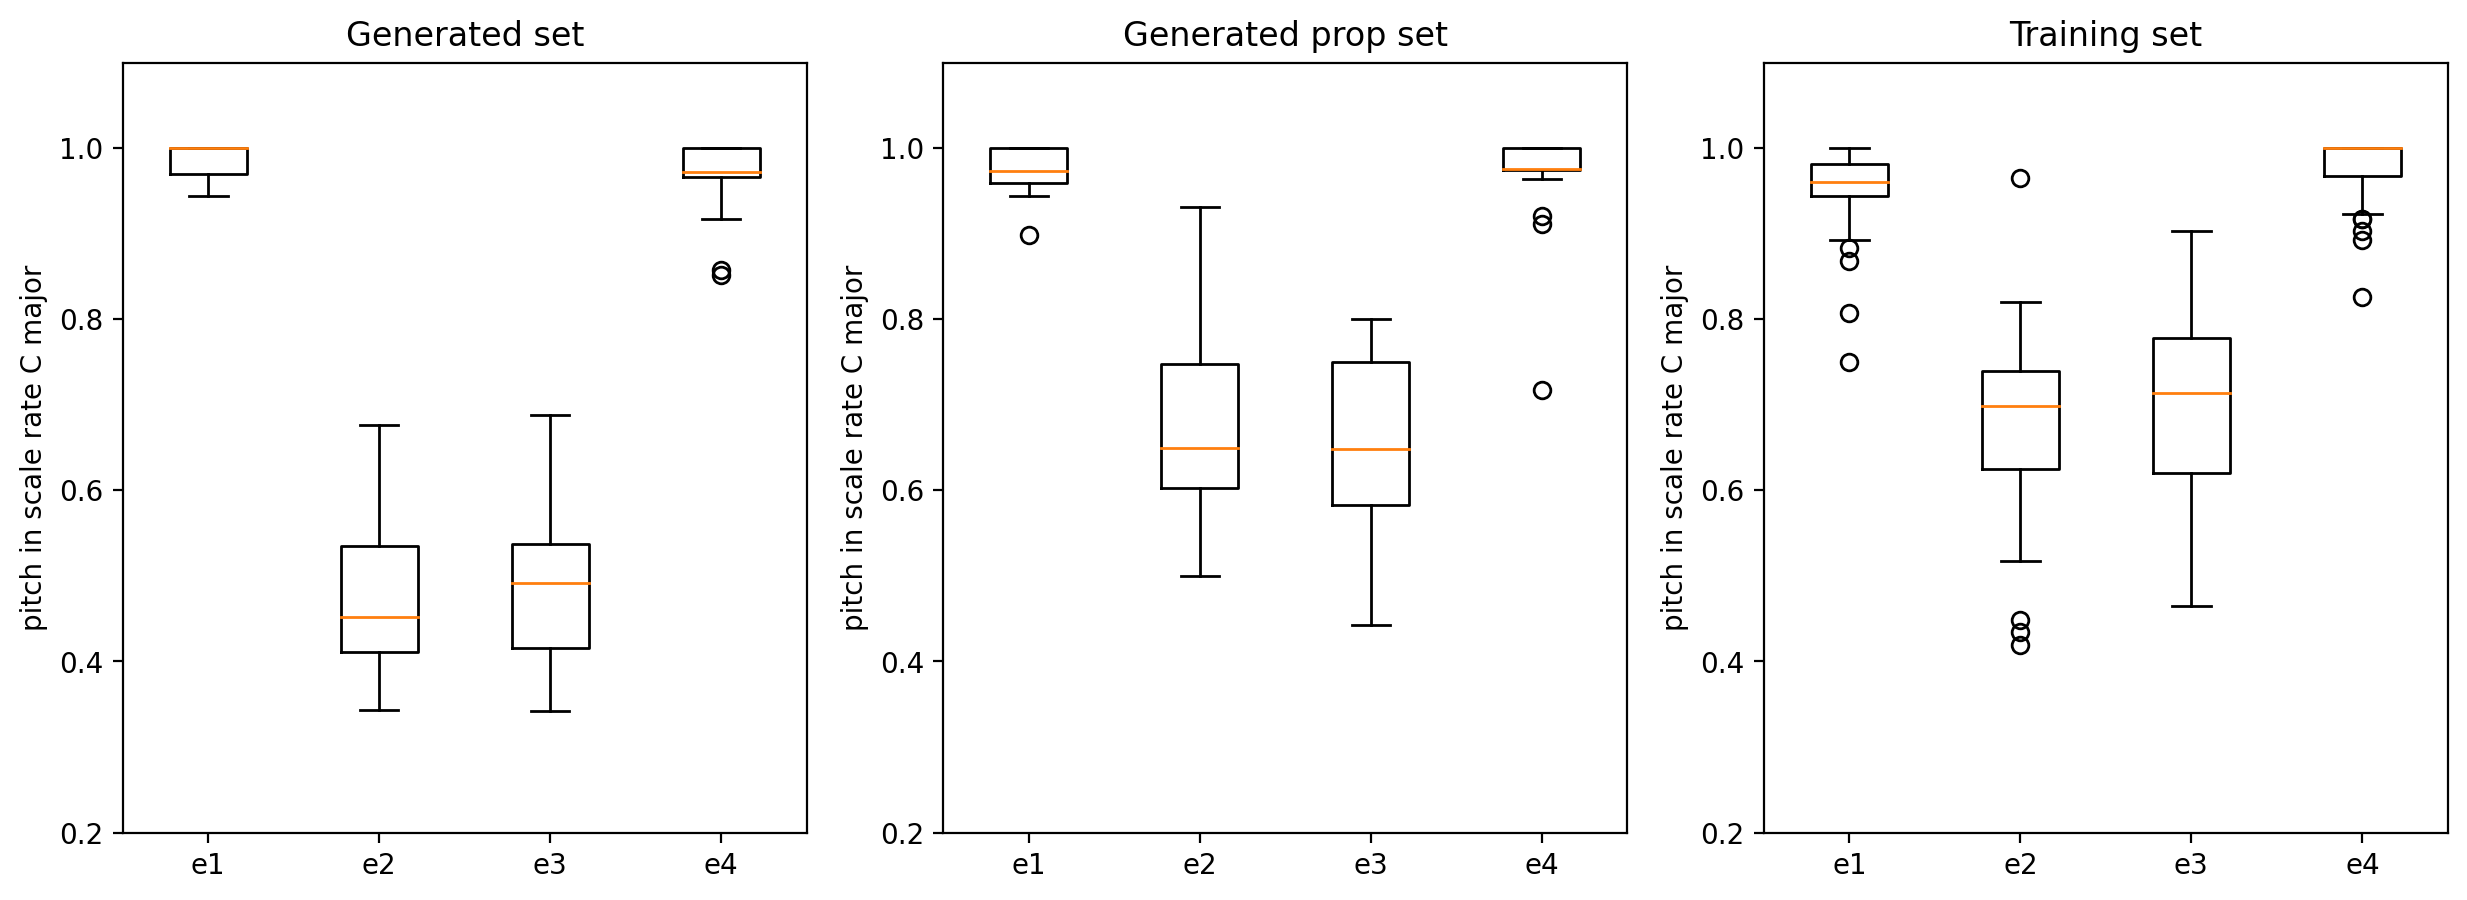

In [42]:
print(np.array(pitch_in_scale_rate_genStat ).shape, np.array(pitch_in_scale_rate_trainStat ).shape)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

# fig = plt.figure(figsize =(5, 4))
# ax1 = fig.add_axes([0, 0, 1, 1])  
bp = ax1.boxplot(pitch_in_scale_rate_genStat) 
ax1.set_xticklabels(['e1', 'e2', 'e3', 'e4']) 
ax1.set_ylabel('pitch in scale rate C major')

ax1.set_ylim(0.2, 1.1)
ax1.set_title('Generated set')
# plt.title('pitch_range')
# plt.title('pitch_range')
# plt.show()

bp = ax2.boxplot(pitch_in_scale_rate_gen_prop_Stat) 
ax2.set_xticklabels(['e1', 'e2', 'e3', 'e4']) 
ax2.set_ylabel('pitch in scale rate C major')
ax2.set_ylim(0.2, 1.1)
ax2.set_title('Generated prop set')

# fig = plt.figure(figsize =(5, 4))
# ax2 = fig.add_axes([0, 0, 1, 1])  
bp = ax3.boxplot(pitch_in_scale_rate_trainStat) 
ax3.set_xticklabels(['e1', 'e2', 'e3', 'e4']) 
ax3.set_ylabel('pitch in scale rate C major')
ax3.set_ylim(0.2, 1.1)
ax3.set_title('Training set')
# plt.title('pitch_range')
plt.show()

### Metric: pitch in scale rate C minor

(4, 20) (4, 77)


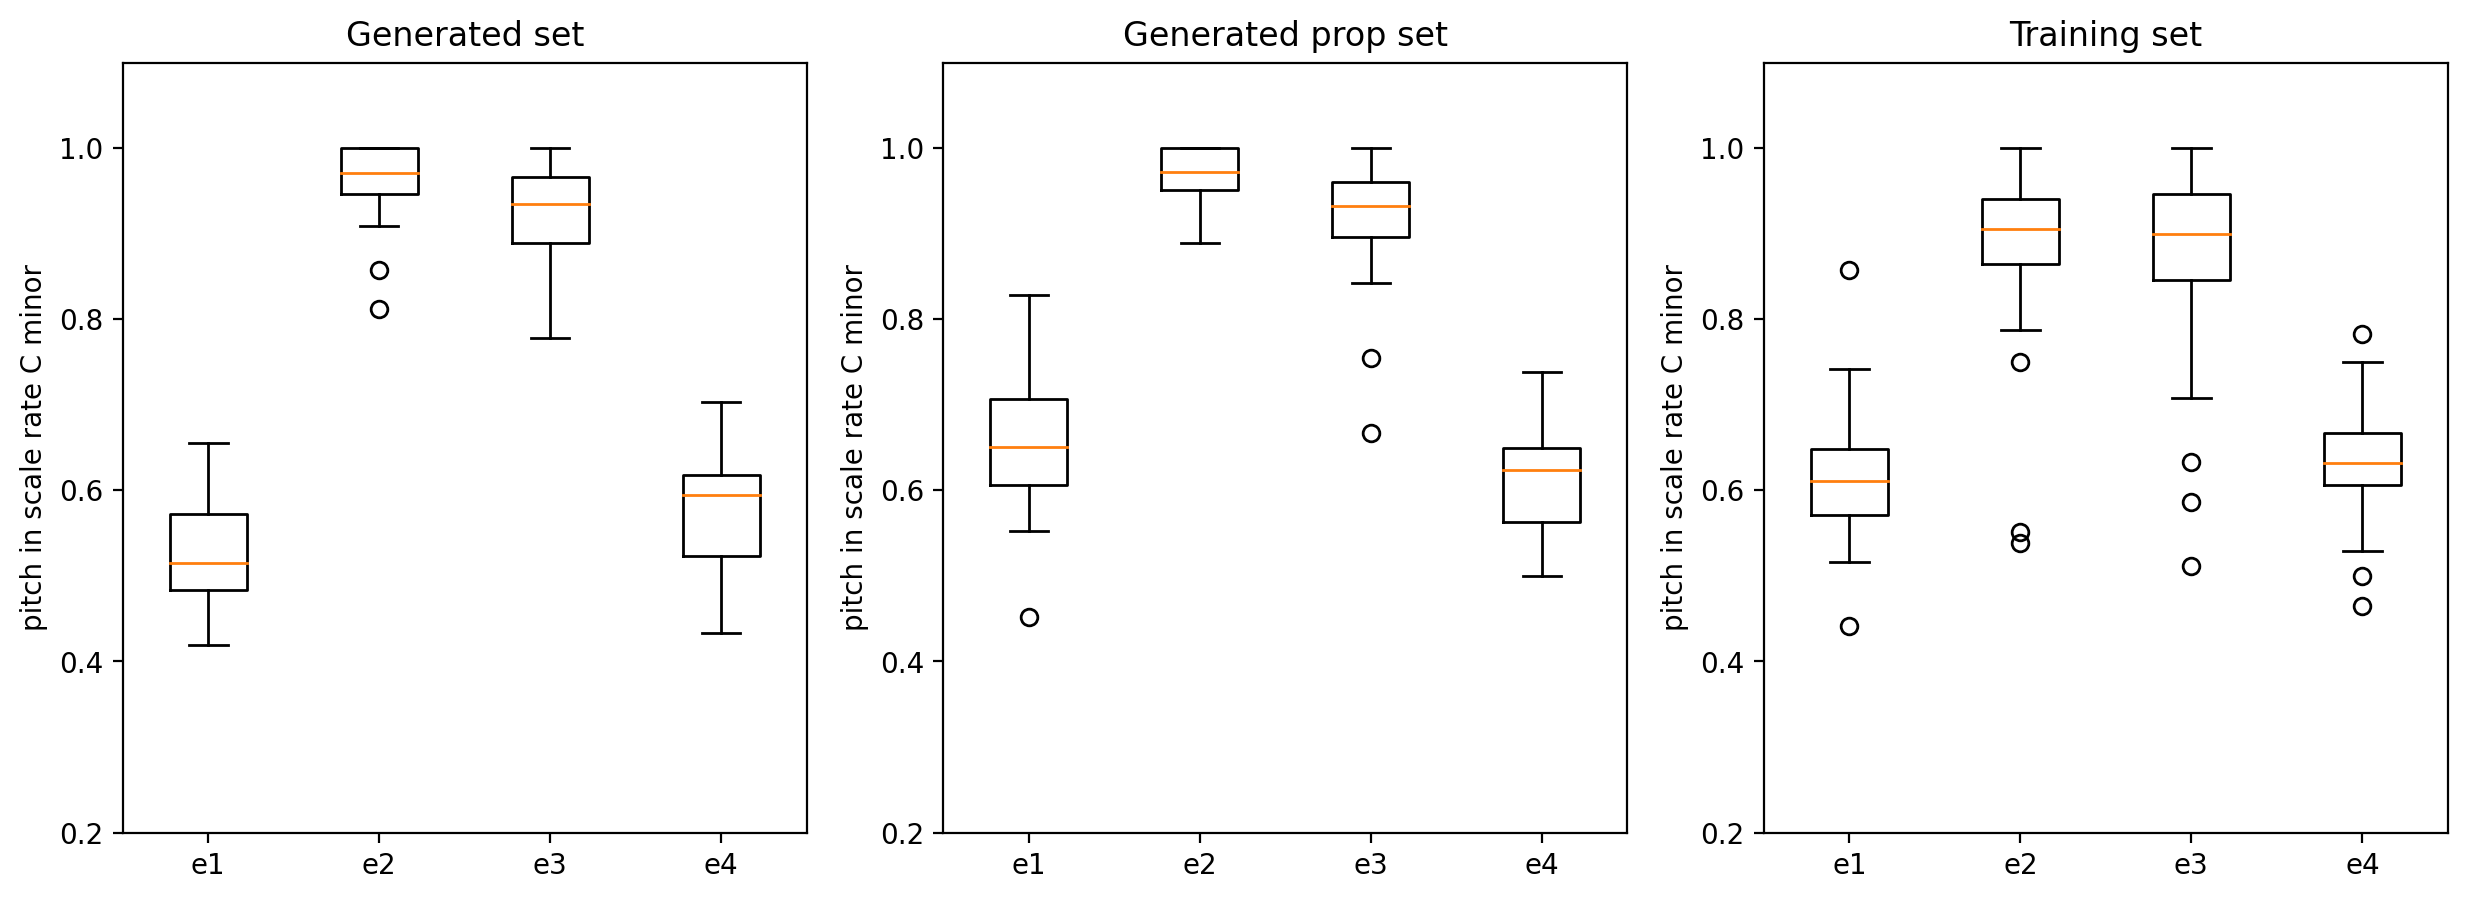

In [41]:
print(np.array(pitch_in_scale_rate_Cmin_genStat ).shape, np.array(pitch_in_scale_rate_Cmin_trainStat ).shape)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

# fig = plt.figure(figsize =(5, 4))
# ax1 = fig.add_axes([0, 0, 1, 1])  
bp = ax1.boxplot(pitch_in_scale_rate_Cmin_genStat) 
ax1.set_xticklabels(['e1', 'e2', 'e3', 'e4']) 
ax1.set_ylabel('pitch in scale rate C minor')
# ax1.set_ylim(1,18)
ax1.set_ylim(0.2, 1.1)
ax1.set_title('Generated set')


bp = ax2.boxplot(pitch_in_scale_rate_Cmin_gen_prop_Stat) 
ax2.set_xticklabels(['e1', 'e2', 'e3', 'e4']) 
ax2.set_ylabel('pitch in scale rate C minor')
ax2.set_ylim(0.2, 1.1)
ax2.set_title('Generated prop set')

# fig = plt.figure(figsize =(5, 4))
# ax2 = fig.add_axes([0, 0, 1, 1])  
bp = ax3.boxplot(pitch_in_scale_rate_Cmin_trainStat) 
ax3.set_xticklabels(['e1', 'e2', 'e3', 'e4']) 
ax3.set_ylabel('pitch in scale rate C minor')
ax3.set_ylim(0.2, 1.1)
ax3.set_title('Training set')
# plt.title('pitch_range')
plt.show()

### Metric: pitch_range

pitch_range_genStat MIN, MAX:  24 50
pitch_range_trainStat MIN, MAX:  12 40
shape: (4, 20) (4, 77)


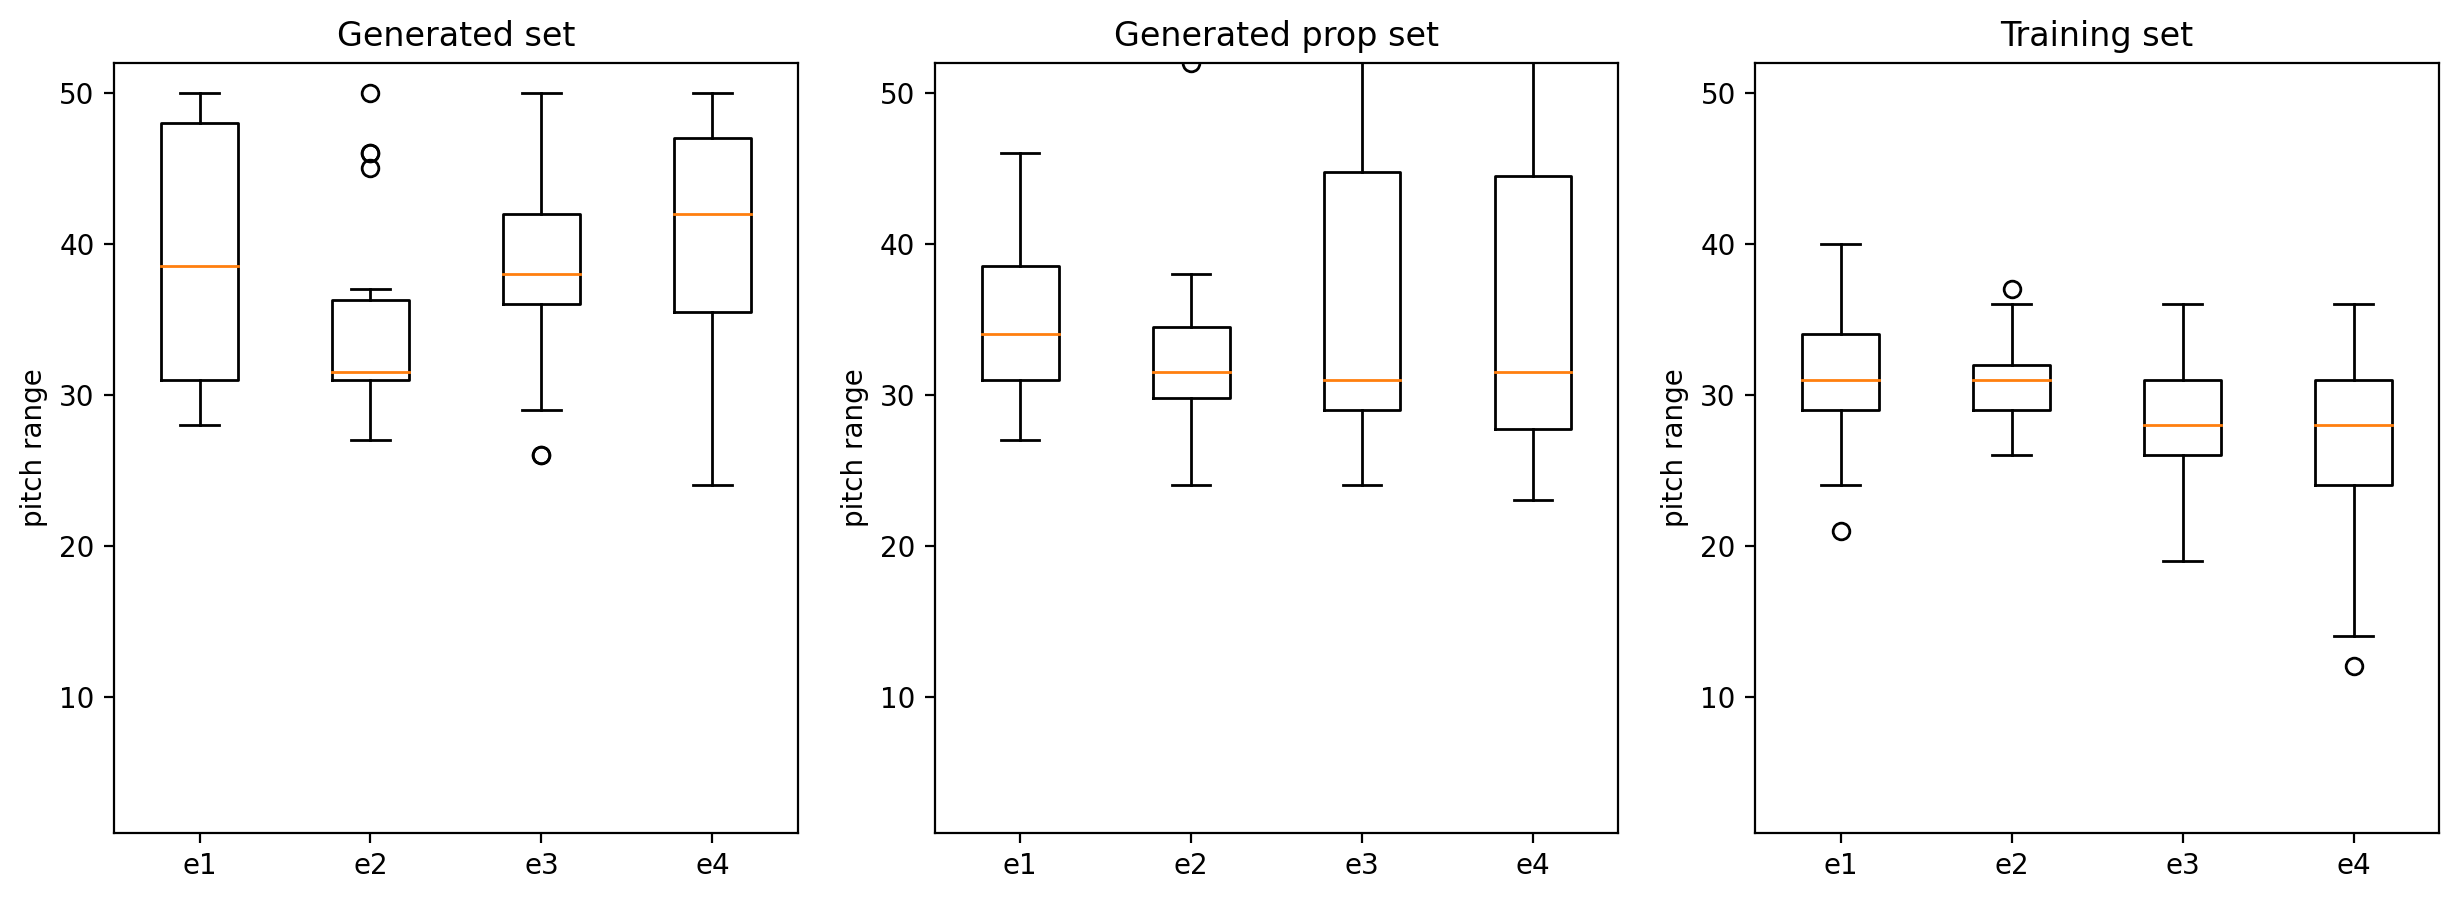

In [40]:
print("pitch_range_genStat MIN, MAX: ", np.min(pitch_range_genStat), np.max(pitch_range_genStat) )
print("pitch_range_trainStat MIN, MAX: ", np.min(pitch_range_trainStat), np.max(pitch_range_trainStat) )
print("shape:", np.array(pitch_range_genStat ).shape, np.array(pitch_range_trainStat ).shape)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

# fig = plt.figure(figsize =(5, 4))
# ax1 = fig.add_axes([0, 0, 1, 1])  
bp = ax1.boxplot(pitch_range_genStat) 
ax1.set_xticklabels(['e1', 'e2', 'e3', 'e4']) 
ax1.set_ylabel('pitch range')
ax1.set_ylim(1,52)
ax1.set_title('Generated set')
# plt.title('pitch_range')
# plt.title('pitch_range')
# plt.show()

bp = ax2.boxplot(pitch_range_gen_prop_Stat) 
ax2.set_xticklabels(['e1', 'e2', 'e3', 'e4']) 
ax2.set_ylabel('pitch range')
ax2.set_ylim(1,52)
ax2.set_title('Generated prop set')

# fig = plt.figure(figsize =(5, 4))
# ax2 = fig.add_axes([0, 0, 1, 1])  
bp = ax3.boxplot(pitch_range_trainStat) 
ax3.set_xticklabels(['e1', 'e2', 'e3', 'e4']) 
ax3.set_ylabel('pitch range')
ax3.set_ylim(1,52)
ax3.set_title('Training set')
# plt.title('pitch_range')
plt.show()

### Metric:  n_pitches_used

n_pitches_used_genStat MIN, MAX:  11 23
n_pitches_used_trainStat MIN, MAX:  8 26
(4, 20) (4, 77)


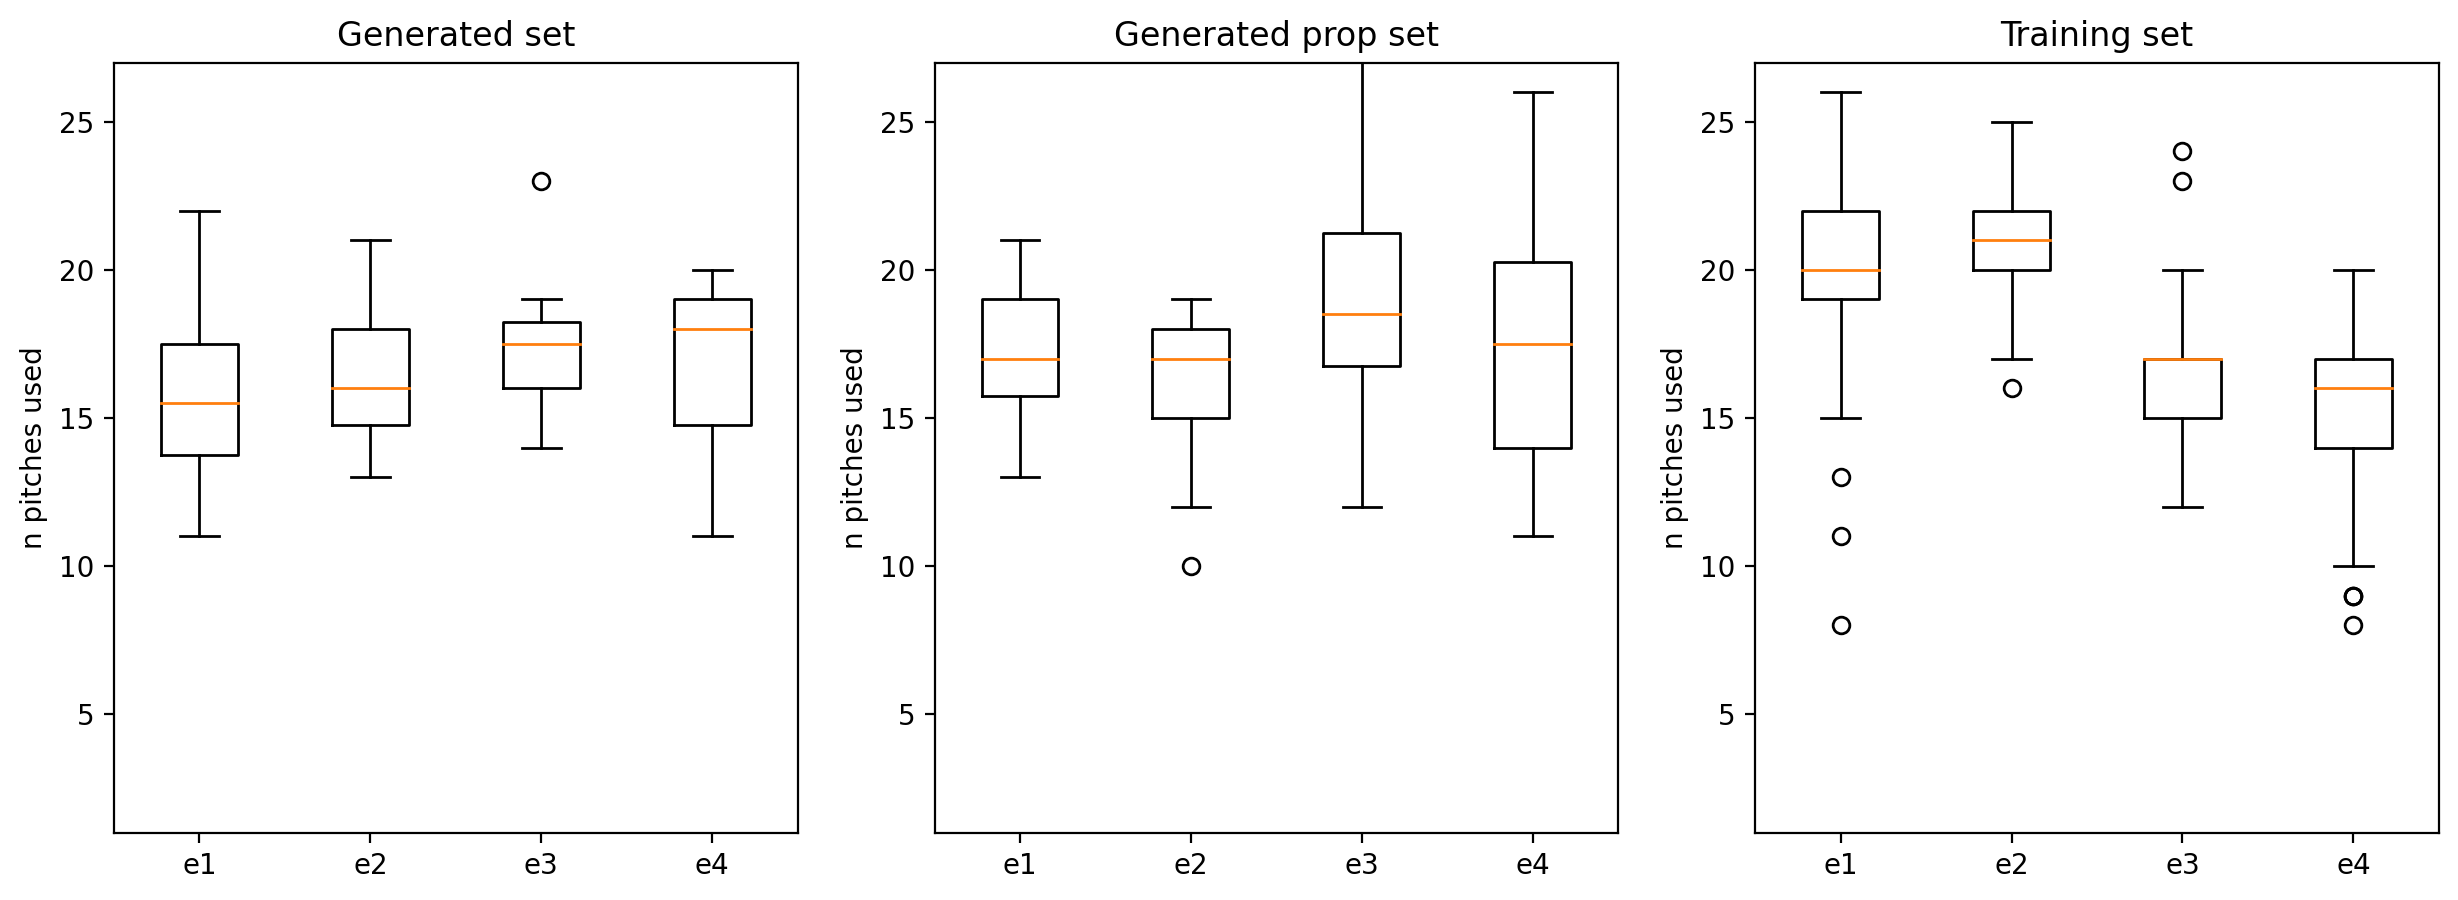

In [39]:
print("n_pitches_used_genStat MIN, MAX: ", np.min(n_pitches_used_genStat), np.max(n_pitches_used_genStat) )
print("n_pitches_used_trainStat MIN, MAX: ", np.min(n_pitches_used_trainStat), np.max(n_pitches_used_trainStat) )
print(np.array(n_pitches_used_genStat ).shape, np.array(n_pitches_used_trainStat ).shape)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

# fig = plt.figure(figsize =(5, 4))
# ax1 = fig.add_axes([0, 0, 1, 1])  
bp = ax1.boxplot(n_pitches_used_genStat) 
ax1.set_xticklabels(['e1', 'e2', 'e3', 'e4']) 
ax1.set_ylabel('n pitches used')
ax1.set_ylim(1,27)
ax1.set_title('Generated set')
# plt.title('pitch_range')
# plt.title('pitch_range')
# plt.show()

bp = ax2.boxplot(n_pitches_used_gen_prop_Stat) 
ax2.set_xticklabels(['e1', 'e2', 'e3', 'e4']) 
ax2.set_ylabel('n pitches used')
ax2.set_ylim(1,27)
ax2.set_title('Generated prop set')

# fig = plt.figure(figsize =(5, 4))
# ax2 = fig.add_axes([0, 0, 1, 1])  
bp = ax3.boxplot(n_pitches_used_trainStat) 
ax3.set_xticklabels(['e1', 'e2', 'e3', 'e4']) 
ax3.set_ylabel('n pitches used')
ax3.set_ylim(1,27)
ax3.set_title('Training set')
# plt.title('pitch_range')
plt.show()

### Metric polyphony_rate

polyphony_rate_genStat MIN, MAX:  0.03125 0.90625
polyphony_rate_trainStat MIN, MAX:  0.4375 1.0
(4, 20) (4, 77)


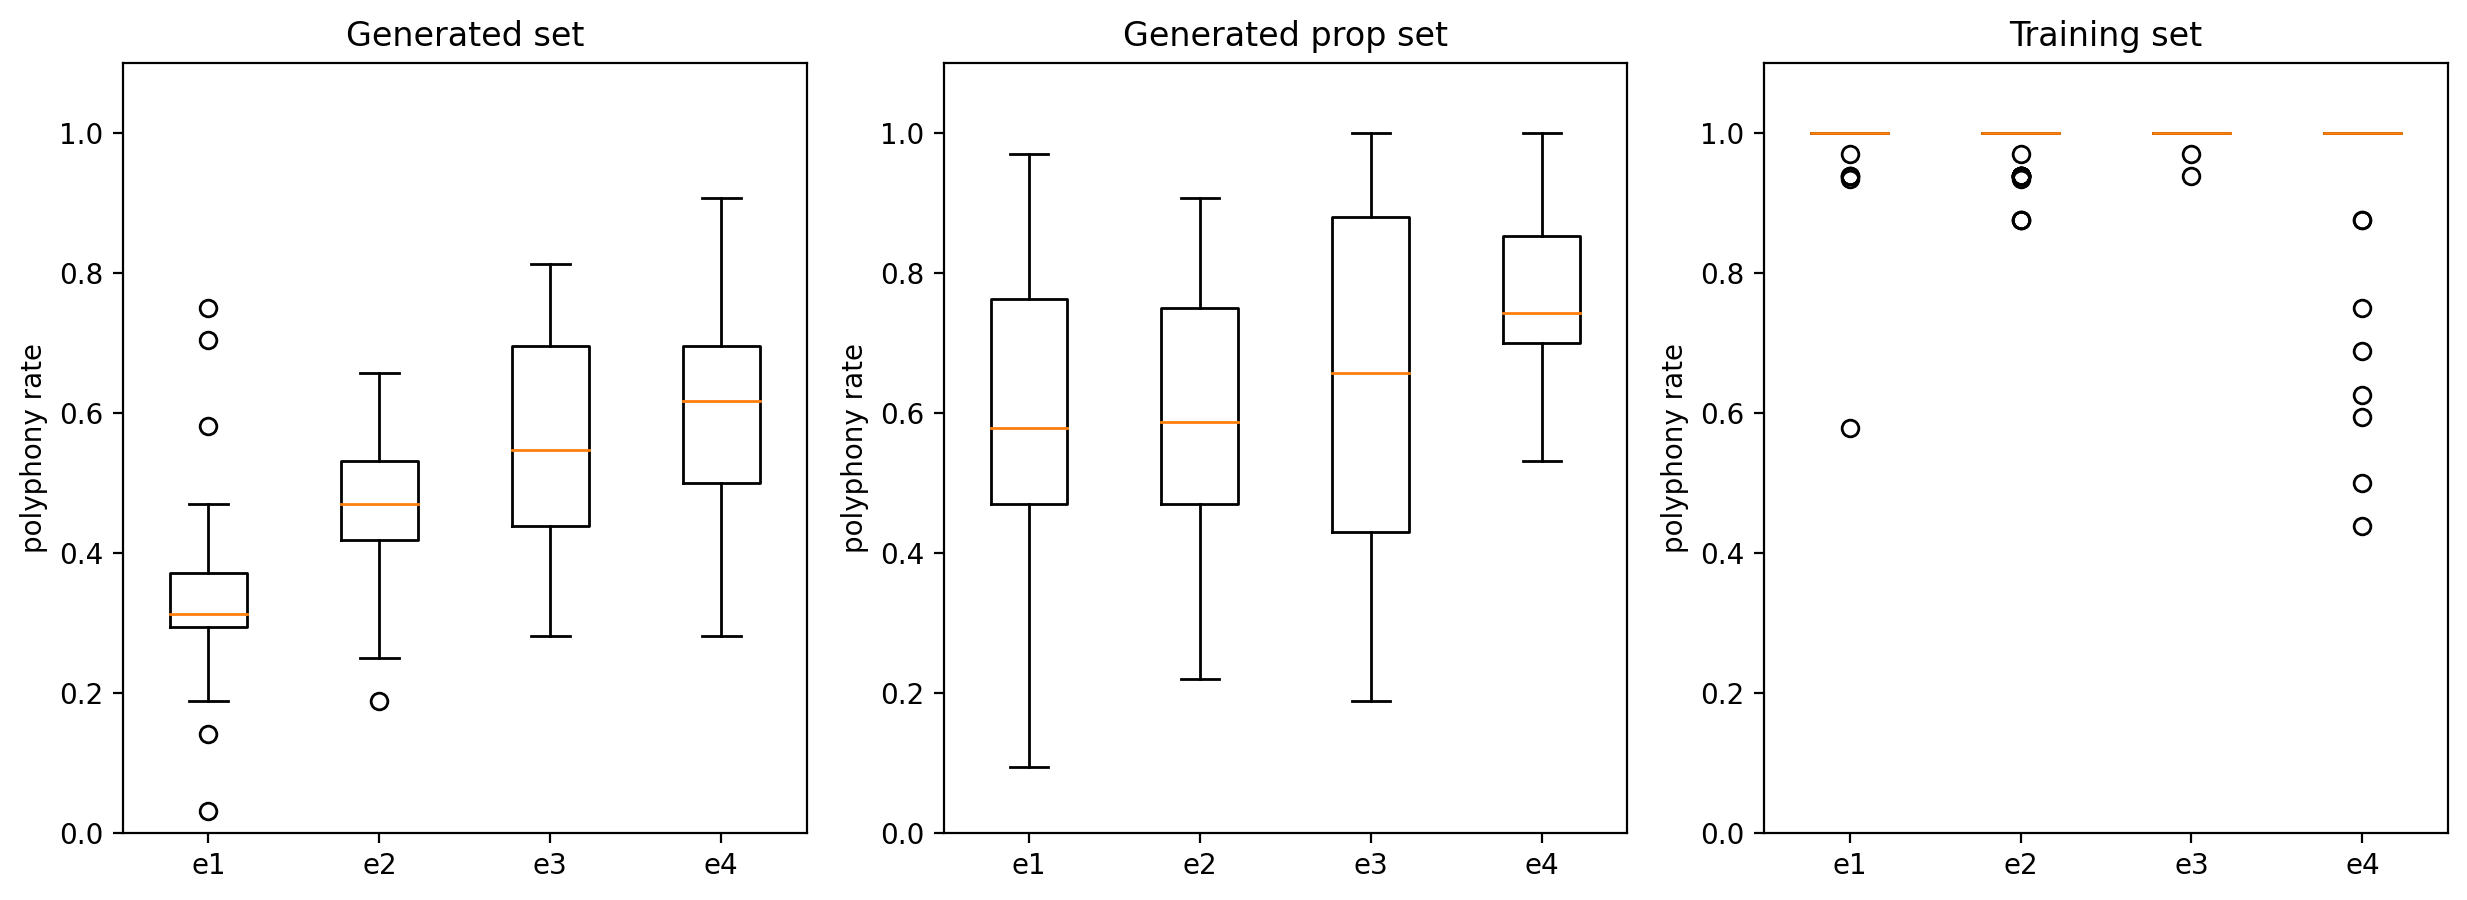

In [44]:
print("polyphony_rate_genStat MIN, MAX: ", np.min(polyphony_rate_genStat), np.max(polyphony_rate_genStat) )
print("polyphony_rate_trainStat MIN, MAX: ", np.min(polyphony_rate_trainStat), np.max(polyphony_rate_trainStat) )
print(np.array(polyphony_rate_genStat ).shape, np.array(polyphony_rate_trainStat ).shape)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

# fig = plt.figure(figsize =(5, 4))
# ax1 = fig.add_axes([0, 0, 1, 1])  
bp = ax1.boxplot(polyphony_rate_genStat) 
ax1.set_xticklabels(['e1', 'e2', 'e3', 'e4']) 
ax1.set_ylabel('polyphony rate')
ax1.set_ylim(0,1.1)
ax1.set_title('Generated set')
# plt.title('pitch_range')
# plt.title('pitch_range')
# plt.show()

bp = ax2.boxplot(polyphony_rate_gen_prop_Stat) 
ax2.set_xticklabels(['e1', 'e2', 'e3', 'e4']) 
ax2.set_ylabel('polyphony rate')
ax2.set_ylim(0,1.1)
ax2.set_title('Generated prop set')

# fig = plt.figure(figsize =(5, 4))
# ax2 = fig.add_axes([0, 0, 1, 1])  
bp = ax3.boxplot(polyphony_rate_trainStat) 
ax3.set_xticklabels(['e1', 'e2', 'e3', 'e4']) 
ax3.set_ylabel('polyphony rate')
ax3.set_ylim(0,1.1)
ax3.set_title('Training set')
# plt.title('pitch_range')
plt.show()

### Stat:  mean and std for metrics and emotions

In [43]:
emo = {0: 'e1', 1: 'e2', 2: 'e3', 3: 'e4'}
numbDec = 2

print ("\t\t\t", "Generated set |", "Generated prop set |", "Training set")
print ("\t\t\t", "mean", "(SD)")
# print ("\t\t",  end=' ')
# for k in range(len(emo)) :
#         print ( "{:>{}}".format(emo[k], 2+numbDec), end=' ' )


print ('-'*((numbDec+3)*4 + 4) )

def jg_print_mean2(genS, genPropS, trainS, StatName):
    StatName = StatName
    genS = genS
    trainS = trainS
    print (StatName,  ":\t")
    

    for j in range(4) : 
        print ("\t\t", emo[j],"\t", end=' ')
        print ( "{:.{}f}".format(np.mean(genS[j]) , numbDec), "({:.{}f})".format(np.std(genS[j]) , numbDec), end=' ')
        print ('|', end=' ') 
        print ( "{:.{}f}".format(np.mean(genPropS[j]) , numbDec), "({:.{}f})".format(np.std(genPropS[j]) , numbDec), end=' ')
        print ('|', end=' ') 
        print ( "{:.{}f}".format(np.mean(trainS[j]) , numbDec), "({:.{}f})".format(np.std(trainS[j]) , numbDec), end=' ')
        print ('')     
       

#     print ('')  
    
# jg_print_mean2(pitch_range_genStat, pitch_range_trainStat, "pitch_range   ")  
# jg_print_mean2(n_pitches_used_genStat, n_pitches_used_trainStat, "n pitches used") 
# jg_print_mean2(pitch_in_scale_rate_genStat, pitch_in_scale_rate_trainStat, "in scale rate_Cmaj") 
# jg_print_mean2(pitch_in_scale_rate_Cmin_genStat, pitch_in_scale_rate_Cmin_trainStat, "in scale rate_Cmin") 
# jg_print_mean2(polyphony_rate_genStat, polyphony_rate_trainStat, "polyphony rate") 

jg_print_mean2(pitch_range_genStat, pitch_range_gen_prop_Stat, pitch_range_trainStat, "pitch_range   ")  
# jg_print_mean2(n_pitches_used_genStat, n_pitches_used_gen_prop_Stat, n_pitches_used_trainStat, "n pitches used") 
jg_print_mean2(pitch_in_scale_rate_genStat, pitch_in_scale_rate_gen_prop_Stat, pitch_in_scale_rate_trainStat, "in scale rate_Cmaj") 
jg_print_mean2(pitch_in_scale_rate_Cmin_genStat, pitch_in_scale_rate_Cmin_gen_prop_Stat, pitch_in_scale_rate_Cmin_trainStat, "in scale rate_Cmin") 
jg_print_mean2(polyphony_rate_genStat, polyphony_rate_gen_prop_Stat, polyphony_rate_trainStat, "polyphony rate")


			 Generated set | Generated prop set | Training set
			 mean (SD)
------------------------
pitch_range    :	
		 e1 	 39.45 (8.33) | 36.55 (8.32) | 31.71 (3.65) 
		 e2 	 34.50 (6.70) | 33.60 (7.95) | 30.70 (2.57) 
		 e3 	 38.25 (5.97) | 37.20 (11.92) | 27.73 (3.25) 
		 e4 	 40.35 (7.54) | 36.20 (11.28) | 27.04 (4.96) 
in scale rate_Cmaj :	
		 e1 	 0.99 (0.02) | 0.97 (0.03) | 0.96 (0.04) 
		 e2 	 0.48 (0.09) | 0.68 (0.11) | 0.68 (0.09) 
		 e3 	 0.50 (0.10) | 0.66 (0.10) | 0.70 (0.10) 
		 e4 	 0.97 (0.04) | 0.96 (0.06) | 0.98 (0.03) 
in scale rate_Cmin :	
		 e1 	 0.52 (0.06) | 0.65 (0.08) | 0.61 (0.06) 
		 e2 	 0.96 (0.05) | 0.97 (0.03) | 0.89 (0.08) 
		 e3 	 0.92 (0.06) | 0.91 (0.08) | 0.88 (0.09) 
		 e4 	 0.57 (0.07) | 0.61 (0.06) | 0.63 (0.06) 
polyphony rate :	
		 e1 	 0.35 (0.17) | 0.59 (0.22) | 0.99 (0.05) 
		 e2 	 0.46 (0.11) | 0.58 (0.18) | 0.99 (0.03) 
		 e3 	 0.56 (0.15) | 0.65 (0.25) | 1.00 (0.01) 
		 e4 	 0.61 (0.18) | 0.77 (0.13) | 0.97 (0.11) 
